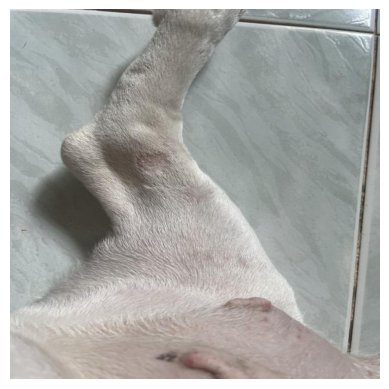

1/1 [==============================] - 0s 362ms/step
Predicted Disease: Skin
Confidence: 0.9999975


In [2]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

model = load_model('/Users/chamidiperera/Documents/FYP Codes/savedModels/detect/MobileNetV2_multi_detect.h5')

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  
    img_array = np.array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = preprocess_input(img_array) 
    return img_array


def predict_disease(image_path, model):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0]) 
    confidence = np.max(predictions[0])  
    return predicted_class, confidence

class_names = {
    0: 'Eye',
    1: 'Skin',
}


image_path = '/Users/chamidiperera/Documents/FYP Codes/Care/backend/models/mobileNetV2/detection/skin.jpg'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

prediction, confidence = predict_disease(image_path, model)
predicted_class = class_names[prediction]
print("Predicted Disease:", predicted_class)
print("Confidence:", confidence)